<a href="https://colab.research.google.com/github/mbk-dev/publications_RUS/blob/main/okid_deposit_indexes_RUB.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

In [ ]:
!pip install okama

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import okama as ok

### Лучшие валютные ставки депозитов. История

In [2]:
ok.symbols_in_namespace('RATE')

,symbol,ticker,name,country,exchange,currency,type
0,RUS_EUR.RATE,RUS_EUR.RATE,Max deposit rates (EUR) in Russian banks,Russia,RATE,EUR,Bank rates
1,RUS_RUB.RATE,RUS_RUB.RATE,Max deposit rates (RUB) in Russian banks,Russia,RATE,RUB,Bank rates
2,RUS_RUB_TOP10.RATE,RUS_RUB_TOP10.RATE,Max deposit rates (RUB) in TOP-10 Russian banks,Russia,RATE,RUB,Bank rates
3,RUS_USD.RATE,RUS_USD.RATE,Max deposit rates (USD) in Russian banks,Russia,RATE,USD,Bank rates


In [3]:
usd = ok.Rate('RUS_USD.RATE').values_ts
eur = ok.Rate('RUS_EUR.RATE').values_ts

Text(0.5, 1.0, 'Лучшие ставки депозитов в USD и EUR')

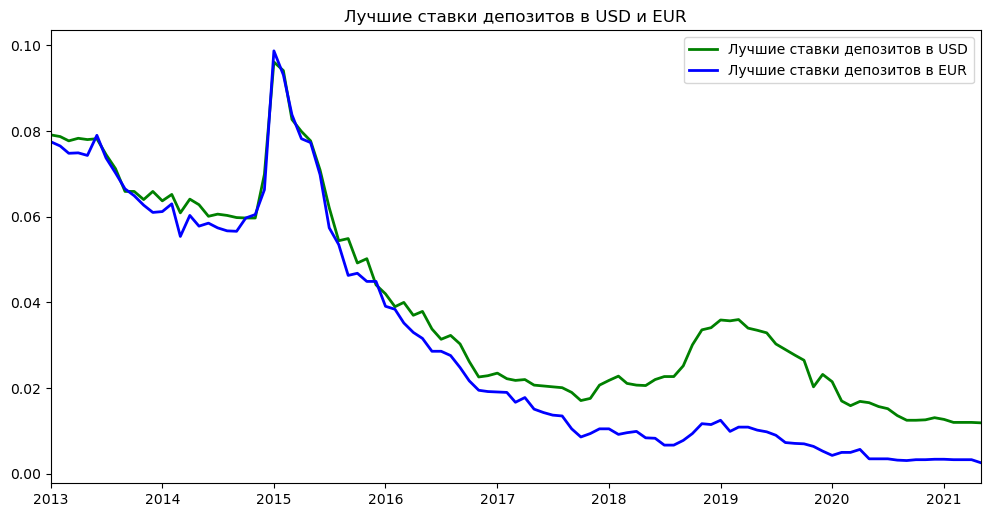

In [4]:
fig = plt.figure(figsize=(12,6))
# fig.subplots_adjust(bottom=0.2, top=1.5)
ax = plt.gca()
ax.plot(usd.index.to_timestamp(), usd.values, color = 'green', linewidth = 2, label='Лучшие ставки депозитов в USD')
ax.plot(eur.index.to_timestamp(), eur.values, color = 'blue', linewidth = 2, label='Лучшие ставки депозитов в EUR')
ax.set_xlim('2013-01', '2021-05')
leg = ax.legend()
ax.set_title('Лучшие ставки депозитов в USD и EUR')

### Доходность валютных депозитов

In [5]:
ls_ccy = ['OKID.INDX', 'OKID_USD.INDX', 'OKID_EUR.INDX']

In [6]:
ccy_indexes = ok.AssetList(ls_ccy, ccy='RUB')
ccy_indexes

symbols          [OKID.INDX, OKID_USD.INDX, OKID_EUR.INDX]
currency                                               RUB
first_date                                         2014-01
last_date                                          2021-04
period_length                            7 years, 4 months
inflation                                         RUB.INFL
dtype: object

In [7]:
df = ccy_indexes.wealth_indexes

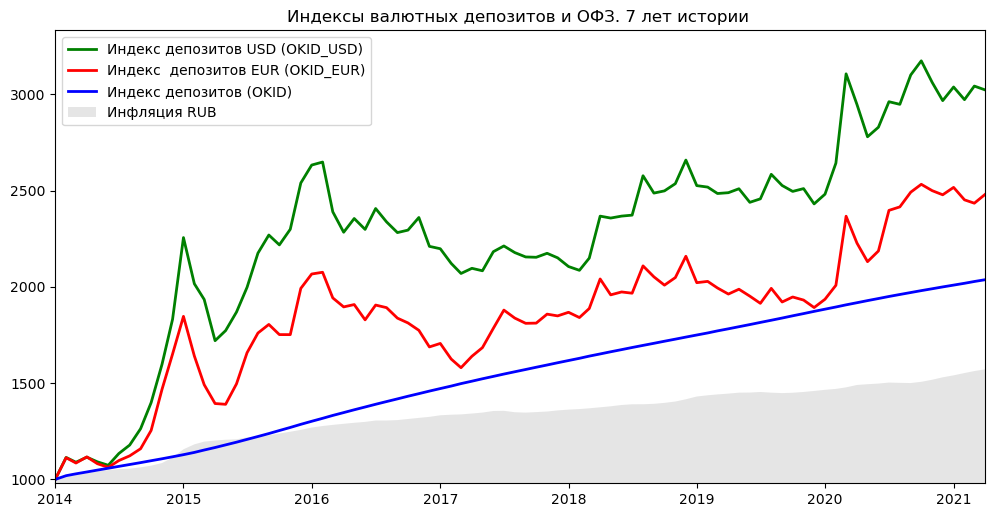

In [8]:
fig = plt.figure(figsize=(12,6))
# fig.subplots_adjust(bottom=0.2, top=1.5)
ax = plt.gca()
ax.plot(df.index.to_timestamp(), df['OKID_USD.INDX'], color = 'green', linewidth = 2, label='Индекс депозитов USD (OKID_USD)')
ax.plot(df.index.to_timestamp(), df['OKID_EUR.INDX'], color = 'red', linewidth = 2, label='Индекс  депозитов EUR (OKID_EUR)')
ax.plot(df.index.to_timestamp(), df['OKID.INDX'], color = 'blue', linewidth = 2, label='Индекс депозитов (OKID)')

ax.fill_between(df.index.to_timestamp(), 0, df['RUB.INFL'], facecolor='grey', alpha=0.2, label='Инфляция RUB')
ax.set_xlim('2014-01', '2021-04')
ax.set_ylim(980,)
ax.set_title('Индексы валютных депозитов и ОФЗ. 7 лет истории ')
leg = ax.legend()

In [9]:
ccy_indexes.describe([1, 3, 5])

,property,period,OKID.INDX,OKID_EUR.INDX,OKID_USD.INDX,inflation
0,Compound return,YTD,0.018730,0.001042,0.018675,0.027172
1,CAGR,1 years,0.062311,0.113876,0.025717,0.054564
2,CAGR,3 years,0.072430,0.067196,0.084864,0.045712
3,CAGR,5 years,0.086237,0.055242,0.057669,0.040485
4,CAGR,"7 years, 4 months",0.101897,0.131898,0.162806,0.063615
5,Dividend yield,LTM,0.000000,0.000000,0.000000,NaN
6,Risk,"7 years, 4 months",0.008882,0.207345,0.229148,NaN
7,CVAR,"7 years, 4 months",-0.062311,0.217122,0.198703,NaN
8,Max drawdowns,"7 years, 4 months",0.000000,-0.247267,-0.237351,NaN
9,Max drawdowns dates,"7 years, 4 months",2014-01,2015-05,2015-04,NaN


In [10]:
df1 = ccy_indexes.get_rolling_cagr(window=12, real=True)

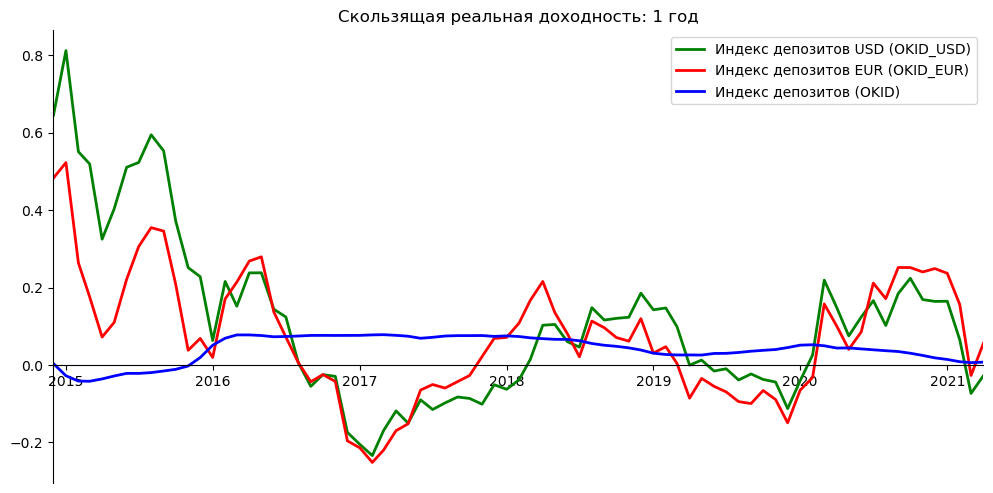

In [11]:
fig = plt.figure(figsize=(12,6))
# fig.subplots_adjust(bottom=0.2, top=1.5)
ax = plt.gca()
ax.plot(df1.index.to_timestamp(), df1['OKID_USD.INDX'], color = 'green', linewidth = 2, label='Индекс депозитов USD (OKID_USD)')
ax.plot(df1.index.to_timestamp(), df1['OKID_EUR.INDX'], color = 'red', linewidth = 2, label='Индекс депозитов EUR (OKID_EUR)')
ax.plot(df1.index.to_timestamp(), df1['OKID.INDX'], color = 'blue', linewidth = 2, label='Индекс депозитов (OKID)')

# ax.fill_between(df.index.to_timestamp(), 0, df['RUB.INFL'], facecolor='grey', alpha=0.2, label='Инфляция RUB')
ax.set_xlim('2014-12', '2021-04')
# ax.set_ylim(980,)

# Регулируем позиции осей
ax.spines['bottom'].set_position('zero')

# Убираем верхнюю и правую ось
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Регулируем шкалу
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Легенда и заголовок
ax.set_title('Скользящая реальная доходность: 1 год')
leg = ax.legend()

In [12]:
df5 = ccy_indexes.get_rolling_cagr(window=12*5, real=True)

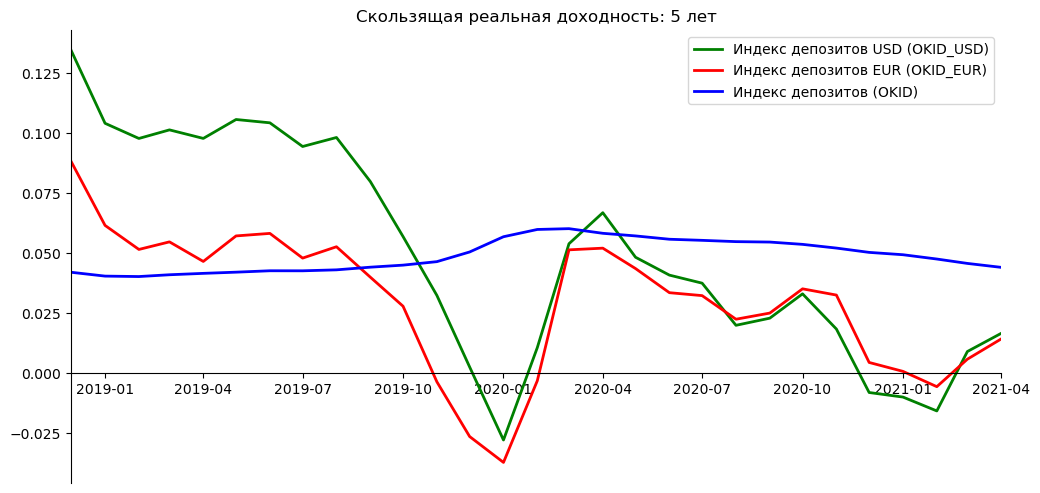

In [13]:
fig = plt.figure(figsize=(12,6))
# fig.subplots_adjust(bottom=0.2, top=1.5)
ax = plt.gca()
ax.plot(df5.index.to_timestamp(), df5['OKID_USD.INDX'], color = 'green', linewidth = 2, label='Индекс депозитов USD (OKID_USD)')
ax.plot(df5.index.to_timestamp(), df5['OKID_EUR.INDX'], color = 'red', linewidth = 2, label='Индекс депозитов EUR (OKID_EUR)')
ax.plot(df5.index.to_timestamp(), df5['OKID.INDX'], color = 'blue', linewidth = 2, label='Индекс депозитов (OKID)')

# ax.fill_between(df.index.to_timestamp(), 0, df['RUB.INFL'], facecolor='grey', alpha=0.2, label='Инфляция RUB')
ax.set_xlim('2018-12', '2021-04')
# ax.set_ylim(980,)

# Регулируем позиции осей
ax.spines['bottom'].set_position('zero')

# Убираем верхнюю и правую ось
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Регулируем шкалу
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Легенда и заголовок
ax.set_title('Скользящая реальная доходность: 5 лет')
leg = ax.legend()

### Еврооблигации и валютные вклады

In [14]:
ok.search('FXRU')

[['FXRU.LSE',
  'FXRU',
  'FinEx Tradable Russian Corporate Bonds UCITS ETF (USD)',
  'UK',
  'LSE',
  'USD',
  'ETF'],
 ['FXRU.MOEX',
  'FXRU',
  'FinEx Funds Public Limited Company - FinEx Tradable Russian Corporate Bonds UCITS ETF',
  'Russia',
  'MOEX',
  'RUB',
  'ETF']]

In [15]:
bonds = ok.AssetList(['FXRU.LSE', 'OKID_USD.INDX', 'OKID_EUR.INDX'], ccy='RUB')
bonds

symbols          [FXRU.LSE, OKID_USD.INDX, OKID_EUR.INDX]
currency                                              RUB
first_date                                        2014-01
last_date                                         2021-04
period_length                           7 years, 2 months
inflation                                        RUB.INFL
dtype: object

In [16]:
bonds.assets_first_dates

{'RUB': Timestamp('1992-08-01 00:00:00'),
 'FXRU.LSE': Timestamp('2013-04-01 00:00:00'),
 'OKID_USD.INDX': Timestamp('2014-01-01 00:00:00'),
 'OKID_EUR.INDX': Timestamp('2014-01-01 00:00:00'),
 'RUB.INFL': Timestamp('2014-01-01 00:00:00')}

In [17]:
df_bonds = bonds.wealth_indexes

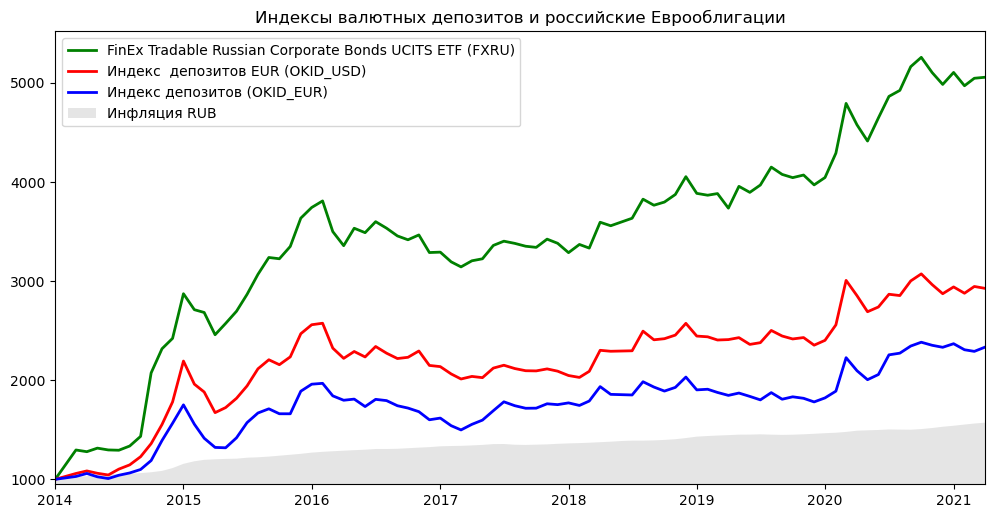

In [18]:
fig = plt.figure(figsize=(12,6))
# fig.subplots_adjust(bottom=0.2, top=1.5)
ax = plt.gca()
ax.plot(df_bonds.index.to_timestamp(), df_bonds['FXRU.LSE'], color = 'green', linewidth = 2, label='FinEx Tradable Russian Corporate Bonds UCITS ETF (FXRU)')
ax.plot(df_bonds.index.to_timestamp(), df_bonds['OKID_USD.INDX'], color = 'red', linewidth = 2, label='Индекс  депозитов EUR (OKID_USD)')
ax.plot(df_bonds.index.to_timestamp(), df_bonds['OKID_EUR.INDX'], color = 'blue', linewidth = 2, label='Индекс депозитов (OKID_EUR)')

ax.fill_between(df.index.to_timestamp(), 0, df['RUB.INFL'], facecolor='grey', alpha=0.2, label='Инфляция RUB')
ax.set_xlim('2014-01', '2021-04')
ax.set_ylim(950,)
ax.set_title('Индексы валютных депозитов и российские Еврооблигации')
leg = ax.legend()

In [19]:
bonds2 = ok.AssetList(['FXRU.LSE', 'RGBITR.INDX'], ccy='RUB')

In [20]:
df_bonds2 = bonds2.wealth_indexes
df_bonds2

,FXRU.LSE,RGBITR.INDX,RUB.INFL
2013-04,1000.000000,1000.000000,1000.000000
2013-05,1023.278434,1001.324760,1011.733660
2013-06,1021.996103,987.806876,1015.982941
2013-07,1032.344120,1001.833733,1024.314001
2013-12,1510.194895,1015.558856,1029.538003
...,...,...,...
2020-12,7526.045487,1958.457440,1556.922564
2021-01,7708.447929,1941.027169,1567.353945
2021-02,7505.592337,1905.700475,1579.579306
2021-03,7619.957149,1894.266272,1590.004529


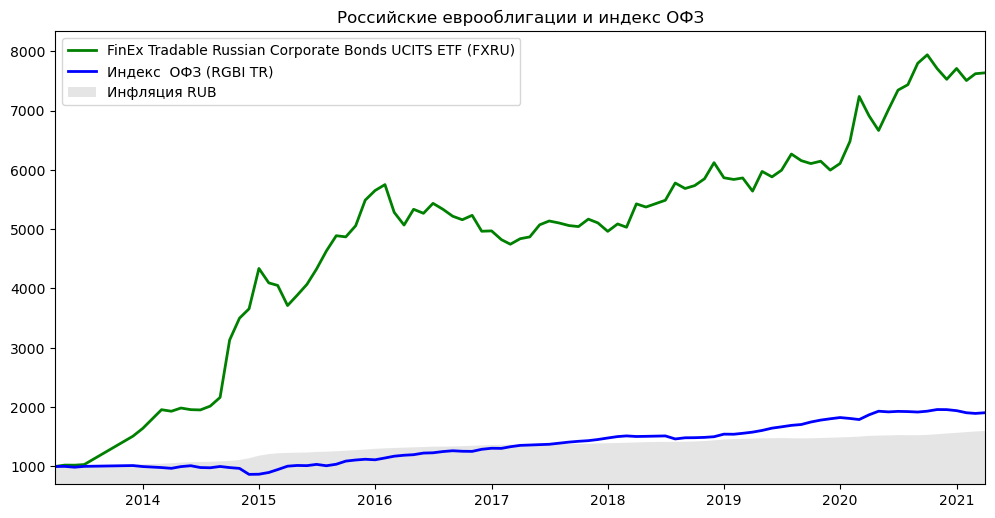

In [21]:
fig = plt.figure(figsize=(12,6))
# fig.subplots_adjust(bottom=0.2, top=1.5)
ax = plt.gca()
ax.plot(df_bonds2.index.to_timestamp(), df_bonds2['FXRU.LSE'], color = 'green', linewidth = 2, label='FinEx Tradable Russian Corporate Bonds UCITS ETF (FXRU)')
ax.plot(df_bonds2.index.to_timestamp(), df_bonds2['RGBITR.INDX'], color = 'blue', linewidth = 2, label='Индекс  ОФЗ (RGBI TR)')

ax.fill_between(df_bonds2.index.to_timestamp(), 0, df_bonds2['RUB.INFL'], facecolor='grey', alpha=0.2, label='Инфляция RUB')
ax.set_xlim('2013-04', '2021-04')
ax.set_ylim(700,)
ax.set_title('Российские еврооблигации и индекс ОФЗ')
leg = ax.legend()

In [22]:
df_bonds2_rolling = bonds2.get_rolling_cagr(window=12, real=True)

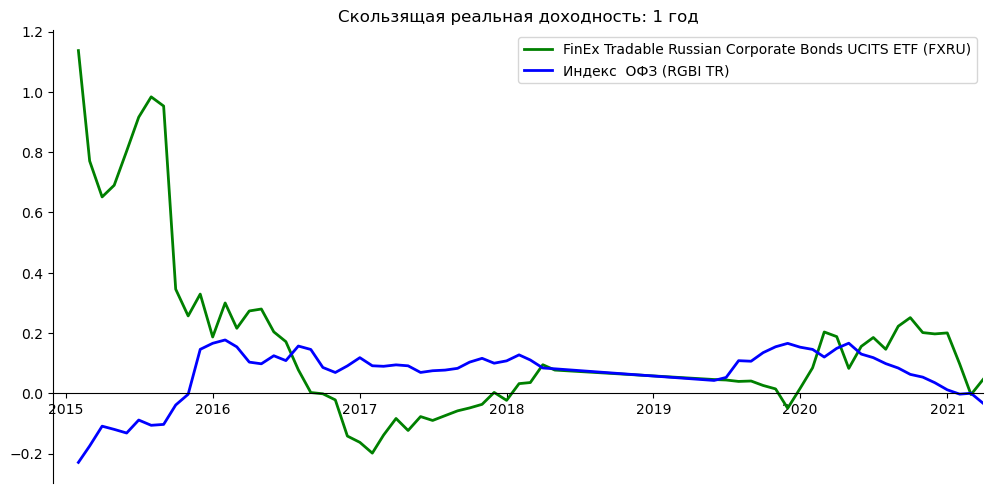

In [23]:
fig = plt.figure(figsize=(12,6))
# fig.subplots_adjust(bottom=0.2, top=1.5)
ax = plt.gca()
ax.plot(df_bonds2_rolling.index.to_timestamp(), df_bonds2_rolling['FXRU.LSE'], color = 'green', linewidth = 2, label='FinEx Tradable Russian Corporate Bonds UCITS ETF (FXRU)')
ax.plot(df_bonds2_rolling.index.to_timestamp(), df_bonds2_rolling['RGBITR.INDX'], color = 'blue', linewidth = 2, label='Индекс  ОФЗ (RGBI TR)')

# ax.fill_between(df.index.to_timestamp(), 0, df['RUB.INFL'], facecolor='grey', alpha=0.2, label='Инфляция RUB')
ax.set_xlim('2014-12', '2021-04')
# ax.set_ylim(980,)

# Регулируем позиции осей
ax.spines['bottom'].set_position('zero')

# Убираем верхнюю и правую ось
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Регулируем шкалу
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Легенда и заголовок
ax.set_title('Скользящая реальная доходность: 1 год')
leg = ax.legend()

### Инструменты с фиксированной доходностью и валюта

In [24]:
usd_ofz = ok.AssetList(['RGBITR.INDX', 'USDRUB.FX', 'EURRUB.FX'], ccy='RUB')
usd_ofz

symbols          [RGBITR.INDX, USDRUB.FX, EURRUB.FX]
currency                                         RUB
first_date                                   2003-01
last_date                                    2021-04
period_length                     18 years, 4 months
inflation                                   RUB.INFL
dtype: object

In [25]:
df_ofz = usd_ofz.wealth_indexes

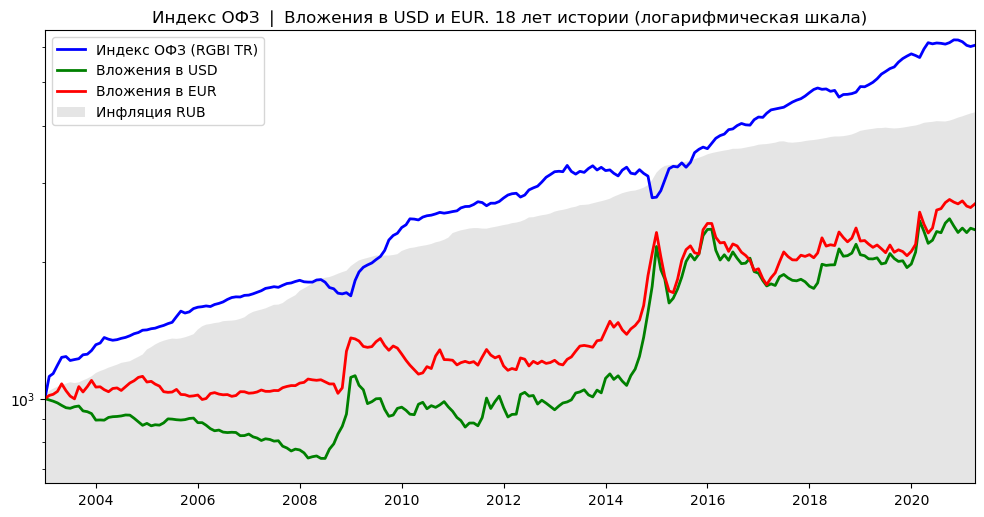

In [26]:
fig = plt.figure(figsize=(12,6))
# fig.subplots_adjust(bottom=0.2, top=1.5)
ax = plt.gca()
ax.plot(df_ofz.index.to_timestamp(), df_ofz['RGBITR.INDX'], color = 'blue', linewidth = 2, label='Индекс ОФЗ (RGBI TR)')
ax.plot(df_ofz.index.to_timestamp(), df_ofz['USDRUB.FX'], color = 'green', linewidth = 2, label='Вложения в USD')
ax.plot(df_ofz.index.to_timestamp(), df_ofz['EURRUB.FX'], color = 'red', linewidth = 2, label='Вложения в EUR')

ax.fill_between(df_ofz.index.to_timestamp(), 0, df_ofz['RUB.INFL'], facecolor='grey', alpha=0.2, label='Инфляция RUB')
ax.set_xlim('2003-01', '2021-04')
ax.set_ylim(650,)

# Логарифмическая шкала осих Y
ax.set_yscale('log')

ax.set_title('Индекс ОФЗ ❘ Вложения в USD и EUR. 18 лет истории (логарифмическая шкала)')
leg = ax.legend()

In [27]:
df_usd_ofz = usd_ofz.get_rolling_cagr(window=12*15, real=True)

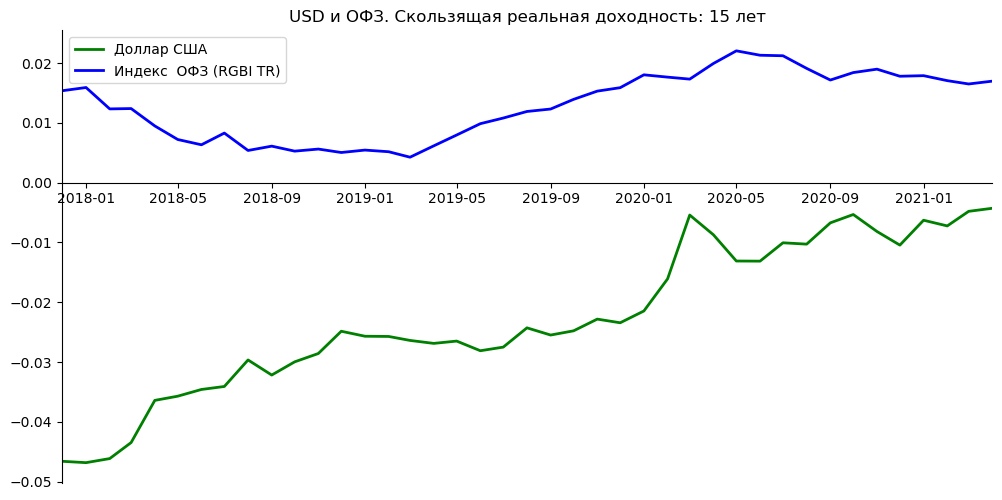

In [28]:
fig = plt.figure(figsize=(12,6))
# fig.subplots_adjust(bottom=0.2, top=1.5)
ax = plt.gca()
ax.plot(df_usd_ofz.index.to_timestamp(), df_usd_ofz['USDRUB.FX'], color = 'green', linewidth = 2, label='Доллар США')
ax.plot(df_usd_ofz.index.to_timestamp(), df_usd_ofz['RGBITR.INDX'], color = 'blue', linewidth = 2, label='Индекс  ОФЗ (RGBI TR)')

# ax.fill_between(df.index.to_timestamp(), 0, df['RUB.INFL'], facecolor='grey', alpha=0.2, label='Инфляция RUB')
ax.set_xlim('2017-12', '2021-04')
# ax.set_ylim(980,)

# Регулируем позиции осей
ax.spines['bottom'].set_position('zero')

# Убираем верхнюю и правую ось
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Регулируем шкалу
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Легенда и заголовок
ax.set_title('USD и ОФЗ. Скользящая реальная доходность: 15 лет')
leg = ax.legend()

In [29]:
usd_ofz.describe()

,property,period,EURRUB.FX,RGBITR.INDX,USDRUB.FX,inflation
0,Compound return,YTD,-0.000159,-0.026683,0.014104,0.027172
1,CAGR,1 years,0.108987,0.018851,0.008943,0.054564
2,CAGR,5 years,0.040522,0.096264,0.031337,0.040485
3,CAGR,10 years,0.083436,0.085521,0.105646,0.061414
4,CAGR,"18 years, 4 months",0.055545,0.103055,0.048003,0.082714
5,Dividend yield,LTM,0.000000,0.000000,0.000000,NaN
6,Risk,"18 years, 4 months",0.145418,0.069538,0.157238,NaN
7,CVAR,"18 years, 4 months",0.221664,0.123375,0.199030,NaN
8,Max drawdowns,"18 years, 4 months",-0.267629,-0.151628,-0.263181,NaN
9,Max drawdowns dates,"18 years, 4 months",2017-03,2014-12,2008-07,NaN


### USD и EUR

In [30]:
usd = ok.AssetList(['USDRUB.FX'], ccy='RUB')
usd

symbols                 [USDRUB.FX]
currency                        RUB
first_date                  1992-08
last_date                   2021-04
period_length    28 years, 9 months
inflation                  RUB.INFL
dtype: object

<AxesSubplot:xlabel='date'>

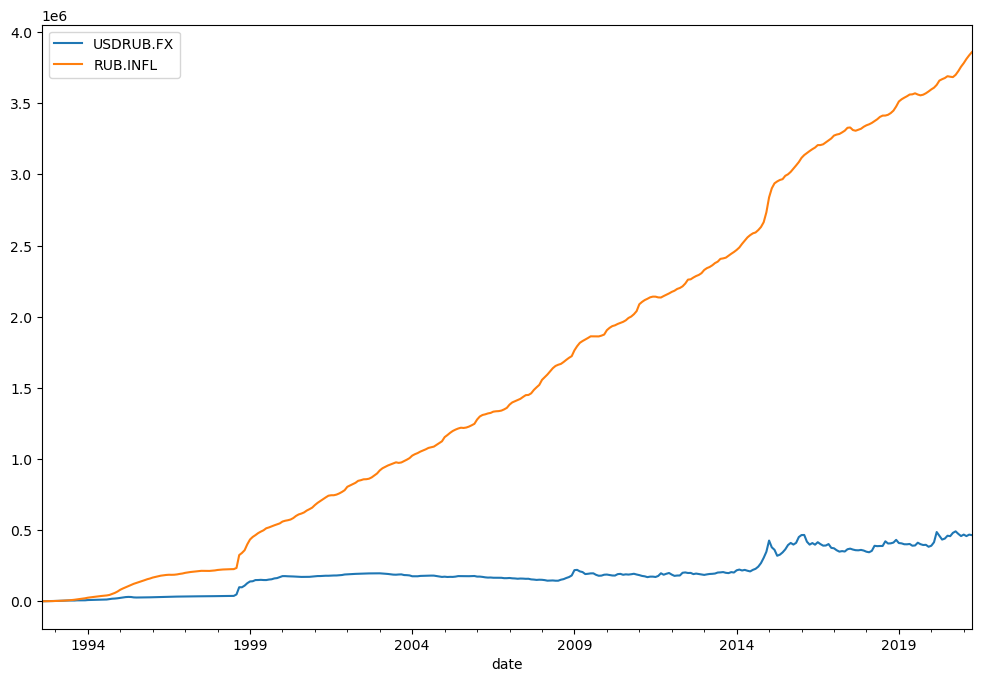

In [31]:
usd.wealth_indexes.plot()

Text(0.5, 1.0, 'Скользящая реальная доходность доллара США. 15 лет')

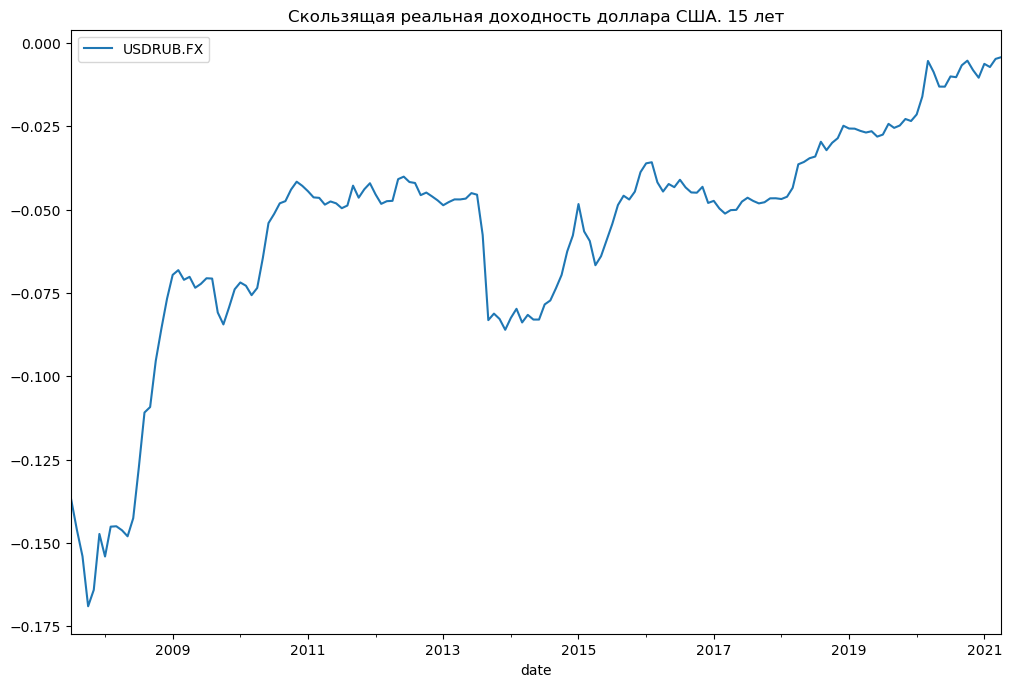

In [32]:
usd.get_rolling_cagr(window=12*15, real=True).plot(legend='test')
plt.title('Скользящая реальная доходность доллара США. 15 лет')